In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("VIRGINIA_RECHARGE_20221115.csv",on_bad_lines="skip")
data['num']=data.index+1
data

,MSISDN,EVT_BEGIN_DT,PYMT_AMT,num
0,5450001862,31-AUG-22,29.0,1
1,5665939873,31-AUG-22,20.0,2
2,7204561708,31-AUG-22,29.0,3
3,1919609632,31-AUG-22,109.0,4
4,2337574762,31-AUG-22,20.0,5
...,...,...,...,...
1008844,7053384810,31-OCT-22,20.0,1008845
1008845,4570694665,31-OCT-22,25.0,1008846
1008846,4570694665,31-OCT-22,20.0,1008847
1008847,4364792010,31-OCT-22,59.0,1008848


In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from lifetimes.plotting import *
from lifetimes.utils import *


df = data[['num', 'MSISDN', 'EVT_BEGIN_DT', 'PYMT_AMT']]
df.MSISDN = df.MSISDN.astype('object')

df.nunique()

datar = summary_data_from_transaction_data(df, 'MSISDN', 'EVT_BEGIN_DT',
                         monetary_value_col='PYMT_AMT',
                         observation_period_end='31-OCT-22')
datar.sort_values('monetary_value')




Text(0.5, 0, 'number of people')

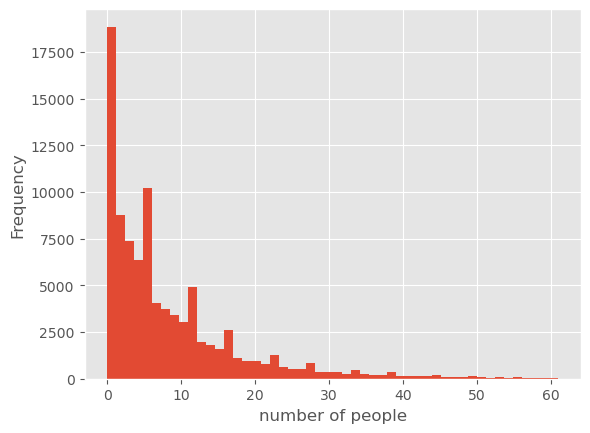

In [4]:
ax = datar['frequency'].plot(kind='hist',bins=50)
ax.set_xlabel('number of people',)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

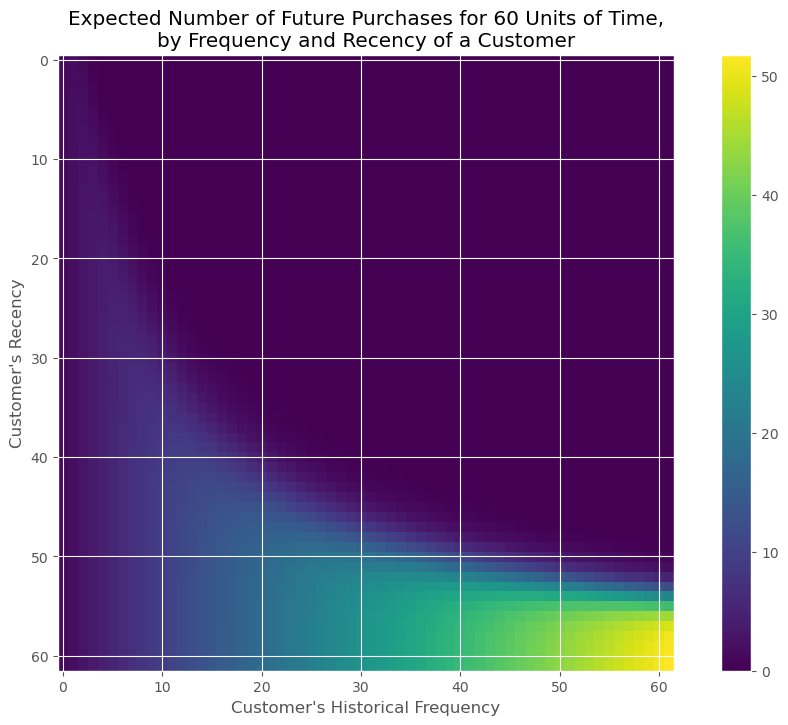

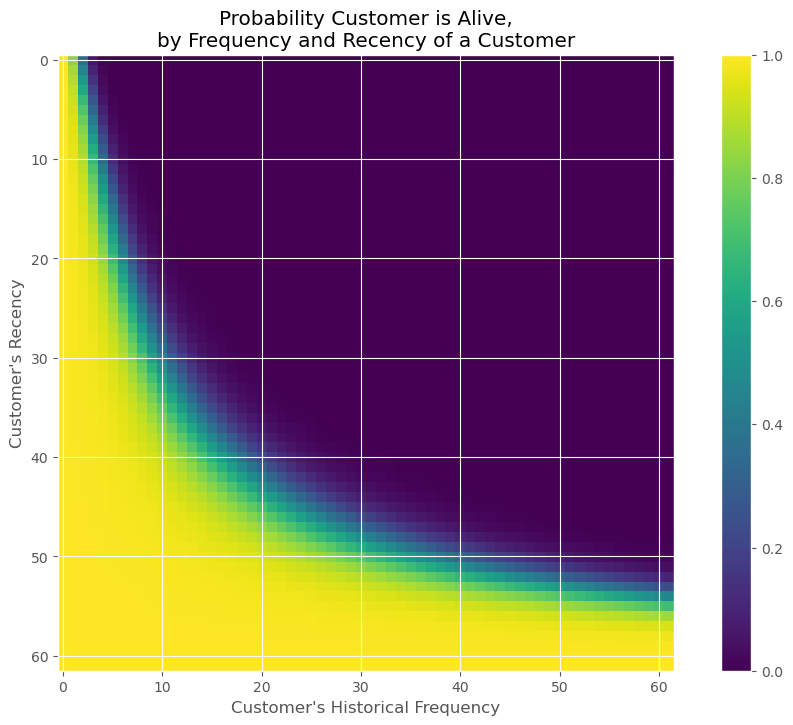

In [5]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(datar['frequency'], datar['recency'], datar['T'],tol=1e-4)


from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt

# visualize our frequency/recency matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf, T=60)

# visualise the probability of a customer being alive
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [6]:
#!pip install lifetimes

,frequency,recency,T,monetary_value,predicted_purchases,p_alive,churn,predicted_Sales,LTV
MSISDN,,,,,,,,,
829815402,11.0,51.0,56.0,442.272727,11.343547,0.995755,not churned,438.851342,4904.561124
2202505230,25.0,58.0,61.0,224.560000,22.300006,0.994982,not churned,223.943164,4920.238332
2992759090,9.0,55.0,59.0,564.444444,9.100558,0.997051,not churned,558.884153,5010.968301
8354830438,1.0,1.0,4.0,500.000000,11.174586,0.996990,not churned,460.161955,5066.164108
7925821143,36.0,60.0,60.0,163.611111,31.958681,0.998434,not churned,163.356714,5143.723785
85953282,25.0,61.0,61.0,240.480000,22.377340,0.998433,not churned,239.797611,5286.846076
1365247585,8.0,49.0,54.0,612.000000,8.874368,0.996584,not churned,605.146918,5290.905385
2145146746,1.0,11.0,15.0,1000.000000,5.887264,0.997577,not churned,913.320483,5297.454710
2213792708,5.0,53.0,61.0,1040.000000,5.413744,0.996605,not churned,1020.449386,5442.743826


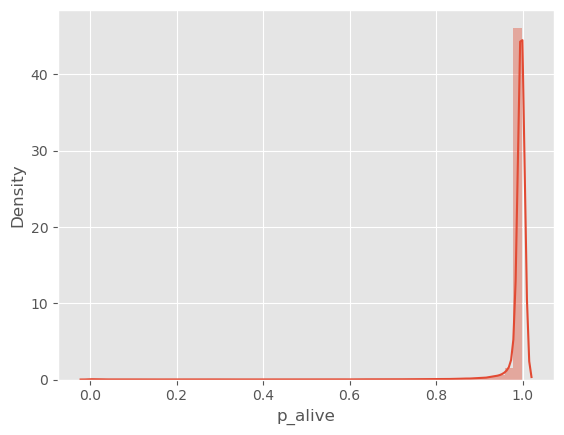

In [43]:
import seaborn as sns
import datetime as dt
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter()
data_f_large = datar[datar['frequency'] > 0]
ggf.fit(frequency = data_f_large['frequency'], monetary_value = data_f_large['monetary_value'])
t = 60
data_f_large['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data_f_large['frequency'], data_f_large['recency'], data_f_large['T'])
 
 
#Calculate probability of being currently alive and assign to each CustomerID
data_f_large['p_alive'] = bgf.conditional_probability_alive(data_f_large['frequency'], data_f_large['recency'], data_f_large['T'])
 
 
sns.distplot(data_f_large['p_alive']);
 
 
data_f_large['churn'] = ['churned' if p_alive < 0.6 else
                            'not churned' for p_alive in data_f_large['p_alive']]
data_f_large['churn'][(data_f_large['p_alive'] >= 0.6) & (data_f_large['p_alive'] < 0.75)] = "high risk"
data_f_large['churn'].value_counts()
 
 
# After applying Gamma-Gamma model, now we can estimate average transaction value for each customer over his/her lifetime
data_f_large['predicted_Sales'] = ggf.conditional_expected_average_profit(data_f_large['frequency'], data_f_large['monetary_value'])
 
 
# calculate LTV for each customer over the next 2 months with an assumed monthly discount rate of 0.01%
data_f_large['LTV'] = ggf.customer_lifetime_value(
    bgf, 
    data_f_large['frequency'], data_f_large['recency'], data_f_large['T'], data_f_large['monetary_value'],
    time = 2, # number of months to predict LTV for
    discount_rate = 0.01 # monthly discount rate ~ 12.7% annually
)
 
# identify our top 20 customers based on LTV
best_projected_cust_LTV = data_f_large.sort_values('LTV').tail(20)
best_projected_cust_LTV

In [8]:
print('total number of customers:', data_f_large.shape[0])

print('not churned:',(data_f_large['churn'] == 'not churned').sum())
print('churned:',(data_f_large['churn'] == 'churned').sum())
print('high risk:',(data_f_large['churn'] == 'high risk').sum())


total number of customers: 81664
not churned: 80737
churned: 617
high risk: 310


In [9]:
data_mstr=pd.read_csv("VIRGINIA_MSTR_20221115.csv",on_bad_lines="skip")

In [10]:
data_mstr.head()

,MONTH_KEY,MSISDN,RG,REGION,AREA,TERRITORY,TOTAL_DSTR,VOICEREV_TOTAL,DATAREV_TOTAL,SMSREV_TOTAL,...,SOFTWARE_OS_NAME,MULTI_SIM,SIM_TYPE,HANDSET_TYPE,HS_CONN,HS_TYPE,SUBS_ALL_90D,SUBS_DU_90D,SUBS_ALL_30D,SUBS_DU_30D
0,31-AUG-22,4173120942,0,BOGURA,SHIBGANJ CLUSTER,SHIBGANJ TERRITORY,0.0,0.0,0.0,0.0,...,Proprietary OS,Supported,2FF,Block,2G,BASIC-DATA CAPABLE,1,0,0,0
1,31-AUG-22,7043749724,0,CUMILLA,CHANDPUR CLUSTER,FARIDGANJ TERRITORY,0.0,0.0,0.0,0.0,...,Proprietary OS,Supported,2FF,Block,2G,BASIC-DATA CAPABLE,1,0,0,0
2,31-AUG-22,2231241705,0,RANGPUR,LALMONIRHAT SADAR CLUSTER,HATIBANDHA TERRITORY,0.0,0.0,0.0,0.0,...,Proprietary OS,Supported,2FF,Unreachable,BASIC,BASIC-VOICE ONLY,1,0,0,0
3,31-AUG-22,9330686557,0,NOAKHALI,BEGUMGANJ CLUSTER,SENBAG TERRITORY,0.0,0.0,0.0,0.0,...,Android v10,Supported,4FF (nano),PDA,4G,SMARTPHONE 4G,1,0,0,0
4,31-AUG-22,712563208,0,BARISHAL,BARISHAL SOUTH CLUSTER,WAZIRPUR TERRITORY,0.0,0.0,0.0,0.0,...,Proprietary OS,Supported,2FF,Block,2G,BASIC-DATA CAPABLE,1,0,0,0


In [11]:
data_f_large.shape

(81664, 9)

In [12]:
1008849

1008849

In [13]:
data_f_large

,frequency,recency,T,monetary_value,predicted_purchases,p_alive,churn,predicted_Sales,LTV
MSISDN,,,,,,,,,
3771,1.0,30.0,34.0,707.000000,3.240124,0.998029,not churned,647.769586,2067.804663
99723,15.0,60.0,61.0,65.666667,13.952143,0.998012,not churned,65.728878,903.510402
171504,11.0,51.0,55.0,94.727273,11.530207,0.996498,not churned,94.541357,1073.971964
353719,15.0,49.0,51.0,122.200000,16.269162,0.997255,not churned,121.875301,1953.525317
525641,1.0,39.0,39.0,20.000000,2.898295,0.998430,not churned,25.129768,71.755949
...,...,...,...,...,...,...,...,...,...
9999370306,31.0,59.0,59.0,21.032258,28.171854,0.998433,not churned,21.210802,588.736533
9999402641,2.0,41.0,49.0,70.000000,3.432306,0.997425,not churned,70.233760,237.497523
9999485479,7.0,56.0,61.0,24.857143,7.130161,0.997080,not churned,25.583270,179.715494


In [31]:
data_mstr_dropped=data_mstr.drop(["MONTH_KEY","VOL_KB_ALL","MODEL","SOFTWARE_OS_NAME","LAC","SITENAME","SUBS_ALL_90D","MULTI_SIM",
                "SUBS_ALL_30D","SUBS_DU_90D","SUBS_DU_30D","SIM_TYPE","TERRITORY","MO_ON_MOU","MO_OFF_MOU","MMS_REV"
                 ,"VAS_REV","IR_REV","AREA",'VOICEREV_SELF','HS_TYPE','REGION','RG'],axis=1)
data_mstr_dropped
#data_mstr_drop['MSISDN']

,MSISDN,TOTAL_DSTR,VOICEREV_TOTAL,DATAREV_TOTAL,SMSREV_TOTAL,MIXED_BUNDLE_REV,VOICEREV_USG,VOICEREV_ALL_BUNDLE,VOICEREV_MIXBUNDLE,VOICEREV_RET,...,PRICE_PLAN,PRODUCT_TYPE,JOINING_DATE,RG_DAYS,VOL_KB_3MNTH,DATA_RG_DAYS,VOICE_RG_DAYS,BRAND,HANDSET_TYPE,HS_CONN
0,4173120942,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,NISHCHINTO,PRP,25-JUL-20,0,9.88,0,0,Tinmo Technology,Block,2G
1,7043749724,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,NISHCHINTO,PRP,17-AUG-21,0,3.01,0,0,Walton Plaza,Block,2G
2,2231241705,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,DJUICE_ADJUSTED,PRP,05-MAY-22,0,13.02,0,0,Lava,Unreachable,BASIC
3,9330686557,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,NISHCHINTO,PRP,22-SEP-18,0,0.00,0,0,Samsung,PDA,4G
4,712563208,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,NISHCHINTO,PRP,11-FEB-22,0,0.00,0,0,Itel,Block,2G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294276,1963812730,67.66,21.08,46.58,0.0,0.00,21.08,0.00,0.00,0.0,...,NISHCHINTO,PRP,25-FEB-19,27,6436008.31,27,5,Samsung,PDA,4G
294277,2864616184,503.31,355.75,142.06,5.3,247.65,0.00,355.75,130.61,0.0,...,DJUICE_ADJUSTED,PRP,10-JUL-07,31,21277268.49,31,23,Samsung,PDA,4G
294278,4090453522,22.46,20.45,0.01,0.0,0.00,20.45,0.00,0.00,0.0,...,NISHCHINTO,PRP,17-JUN-13,29,463.98,29,6,Walton Plaza,Block,2G
294279,7733248473,140.34,9.60,128.74,0.0,0.00,9.60,0.00,0.00,0.0,...,NISHCHINTO,PRP,04-JUN-19,27,20468781.54,27,6,Itel,PDA,4G


In [33]:
#combine 2 months' data into 1
data_mstr_dropped=data_mstr_dropped.groupby('MSISDN').sum()
data_mstr_dropped
data_final=data_mstr.drop(list(data_mstr_dropped),axis=1)
data_final=data_final.drop_duplicates(subset=['MSISDN']).sort_values('MSISDN')
data_final.reset_index(drop=True,inplace=True)
data_mstr_dropped.reset_index(inplace=True,drop=True)
data_final = pd.concat([data_mstr_dropped,data_final], axis=1)
data_final.to_csv('data_final.csv',index=False)

In [37]:
data_combined=pd.read_csv("data_final.csv",on_bad_lines="skip")
data_combined
#list(data_combined.columns.values)

,TOTAL_DSTR,VOICEREV_TOTAL,DATAREV_TOTAL,SMSREV_TOTAL,MIXED_BUNDLE_REV,VOICEREV_USG,VOICEREV_ALL_BUNDLE,VOICEREV_MIXBUNDLE,VOICEREV_RET,VOICEREV_TRIG,...,SOFTWARE_OS_NAME,MULTI_SIM,SIM_TYPE,HANDSET_TYPE,HS_CONN,HS_TYPE,SUBS_ALL_90D,SUBS_DU_90D,SUBS_ALL_30D,SUBS_DU_30D
0,2011.48,44.98,1966.50,0.00,0.00,44.98,0.00,0.00,0.0,0.00,...,Android v8.1,Supported,4FF (nano),PDA,4G,SMARTPHONE 4G,1,1,1,1
1,1276.56,1276.56,0.00,0.00,0.00,0.02,1276.55,0.00,0.0,1269.80,...,Android v10,Supported,4FF (nano),PDA,4G,SMARTPHONE 4G,1,1,1,1
2,1103.60,1103.10,0.00,0.50,0.00,1103.10,0.00,0.00,0.0,0.00,...,Proprietary OS,Supported,2FF,Block,2G,BASIC-DATA CAPABLE,1,0,1,0
3,1852.67,1282.38,545.94,23.40,1206.76,601.66,680.72,636.44,0.0,44.28,...,Proprietary OS,Supported,2FF,Block,BASIC,BASIC-DATA CAPABLE,1,0,1,0
4,31.05,31.05,0.00,0.00,0.00,31.05,0.00,0.00,0.0,0.00,...,Proprietary OS,Supported,2FF,Block,2G,BASIC-DATA CAPABLE,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99483,288.92,129.27,158.66,1.00,0.00,36.96,92.31,0.00,0.0,0.00,...,Android v7.0,Supported,3FF (micro),PDA,3G,SMARTPHONE,1,1,1,1
99484,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,Proprietary OS,Supported,2FF,Block,BASIC,BASIC-VOICE ONLY,1,0,0,0
99485,572.11,275.92,162.72,133.45,31.52,121.97,153.95,16.62,0.0,0.00,...,Android v9.0,Supported,4FF (nano),PDA,4G,SMARTPHONE 4G,1,1,1,1
99486,119.92,119.42,0.00,0.50,0.00,119.42,0.00,0.00,0.0,0.00,...,Proprietary OS,Supported,2FF,Block,BASIC,BASIC-VOICE ONLY,1,0,1,0


In [38]:
frame = []
frame.append(data_combined[1:1])

for x in data_f_large.index:
    data_mstr_f_large_no = data_combined[data_combined.MSISDN == x]
    frame.append(data_mstr_f_large_no) 
# data_mstr_f_large = data_mstr_f_large.append(data_mstr_f_large_no, ignore_index = True)

In [39]:
data_mstr_f_large = pd.concat(frame)

In [40]:
data_mstr_f_large.to_csv('id_with_1ormore_freq.csv', index=False)
data_mstr_f_large

,TOTAL_DSTR,VOICEREV_TOTAL,DATAREV_TOTAL,SMSREV_TOTAL,MIXED_BUNDLE_REV,VOICEREV_USG,VOICEREV_ALL_BUNDLE,VOICEREV_MIXBUNDLE,VOICEREV_RET,VOICEREV_TRIG,...,SOFTWARE_OS_NAME,MULTI_SIM,SIM_TYPE,HANDSET_TYPE,HS_CONN,HS_TYPE,SUBS_ALL_90D,SUBS_DU_90D,SUBS_ALL_30D,SUBS_DU_30D
0,2011.48,44.98,1966.50,0.00,0.00,44.98,0.00,0.00,0.0,0.00,...,Android v8.1,Supported,4FF (nano),PDA,4G,SMARTPHONE 4G,1,1,1,1
1,1276.56,1276.56,0.00,0.00,0.00,0.02,1276.55,0.00,0.0,1269.80,...,Android v10,Supported,4FF (nano),PDA,4G,SMARTPHONE 4G,1,1,1,1
2,1103.60,1103.10,0.00,0.50,0.00,1103.10,0.00,0.00,0.0,0.00,...,Proprietary OS,Supported,2FF,Block,2G,BASIC-DATA CAPABLE,1,0,1,0
3,1852.67,1282.38,545.94,23.40,1206.76,601.66,680.72,636.44,0.0,44.28,...,Proprietary OS,Supported,2FF,Block,BASIC,BASIC-DATA CAPABLE,1,0,1,0
4,31.05,31.05,0.00,0.00,0.00,31.05,0.00,0.00,0.0,0.00,...,Proprietary OS,Supported,2FF,Block,2G,BASIC-DATA CAPABLE,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99481,741.47,335.78,405.67,0.00,0.00,18.34,317.44,0.00,0.0,0.00,...,Android v10,Supported,4FF (nano),PDA,4G,SMARTPHONE 4G,1,1,1,1
99482,297.75,297.75,0.00,0.00,0.00,19.32,278.43,0.00,0.0,0.00,...,Proprietary OS,Supported,2FF,Unreachable,BASIC,BASIC-VOICE ONLY,1,0,1,0
99483,288.92,129.27,158.66,1.00,0.00,36.96,92.31,0.00,0.0,0.00,...,Android v7.0,Supported,3FF (micro),PDA,3G,SMARTPHONE,1,1,1,1
99485,572.11,275.92,162.72,133.45,31.52,121.97,153.95,16.62,0.0,0.00,...,Android v9.0,Supported,4FF (nano),PDA,4G,SMARTPHONE 4G,1,1,1,1


In [41]:
data_mstr_f_0 = pd.concat([data_mstr_f_large, data_combined], ignore_index=True, verify_integrity=True, sort=True)
data_mstr_f_0.drop_duplicates(subset=['MSISDN'], keep=False, inplace=True)
data_mstr_f_0.to_csv('id_with_0_freq.csv', index=False)
data_mstr_f_0

,AREA,BRAND,CELL,DATAREV_ALL_BUNDLE,DATAREV_MIXBUNDLE,DATAREV_PAYG,DATAREV_RET,DATAREV_SC,DATAREV_SELF,DATAREV_TOTAL,...,VOICEREV_RET,VOICEREV_SC,VOICEREV_SELF,VOICEREV_TOTAL,VOICEREV_TRIG,VOICEREV_USG,VOICE_RG_DAYS,VOL_KB,VOL_KB_3MNTH,VOL_KB_ALL
81619,KISHOREGANJ CLUSTER,Oppo,9A09,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,1.38,0.0,1.38,1,0.00,2033.30,2033.30
81626,BARISHAL METRO CLUSTER,Lava,4B46,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,11.96,0.0,11.96,1,0.00,0.00,0.00
81633,DINAJPUR OUTER CLUSTER,Itel,2E88,0.0,0.0,0.75,0.0,0.0,0.0,0.75,...,0.0,0.00,0.00,19.32,0.0,19.32,4,769.14,1031.10,1031.10
81637,MOHAMMADPUR CLUSTER,Alamin & Brothers,CED5,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,13.50,20.26,54.59,0.0,20.82,11,1.13,307.60,7.55
81638,KHULNA OUTER CLUSTER,SB Tel,CD04,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,37.63,0.0,37.63,4,1.12,3.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181068,KISHOREGANJ CLUSTER,NaN,278680D,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,0.00,0.0,0.00,0,0.00,170.66,658.42
181088,PIRGANJ CLUSTER,Walton Plaza,37ED,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,27.13,0.0,27.13,7,0.00,154.76,7.76
181090,GOPALGONJ CLUSTER,Itel,599A,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,67.66,0.0,67.66,25,0.00,0.66,0.00
181098,KURIGRAM SADAR CLUSTER,SB Tel,967D,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,0.00,0.0,0.00,0,0.00,0.00,0.00
